# Part 1:  Simple linear regression for one independent variable

In this lab, you will load data, plot data, perform simple mathematical manipulations, and fit a simple linear regression model.  Before doing this lab, you can go through the class demo on simple linear regression for an automobile dataset.  This lab uses the Boston housing data set, a widely-used machine learning data set for illustrating basic concepts.  

## Loading the data

The Boston housing data set was collected in the 1970s to study the relationship between house price and various factors such as the house size, crime rate, socio-economic status, etc.  Since the variables are easy to understand, the data set is ideal for learning basic concepts in machine learning.  The raw data and a complete description of the dataset can be found on the UCI website:

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

Each row in the dataset it not a single house -- it corresponds to the average information about homes in a single single [census track](https://en.wikipedia.org/wiki/Census_tract).

In the lab, you will complete all the code marked `TODO`.

First, complete the following code that uses the `pd.read_csv` command to read the data from the file located at

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

I have supplied a list `names` of the column headers.  You will have to set the options in the `read_csv` command to correctly delimit the data in the file and name the columns correctly.

In [4]:
import pandas as pd
import numpy as np
colnames =[
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
    'AGE',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'
]

# TODO:  Complete the code
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',delim_whitespace=True,names=colnames)


Display the first six rows of the data frame

In [5]:
# TODO
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Basic Manipulations on the Data

What is the shape of the data?  How many attributes are there?  How many samples?
Print a statement of the form:

    num samples=xxx, num attributes=yy

In [16]:
# TODO
shape = df.shape
num_sample = shape[0]
num_attributes = shape[1]
print('num_samples: ' + str(num_sample), 'num_attributes: ' + str(num_attributes))

num_samples: 506 num_attributes: 14


Create a response vector `y` with the values in the column `PRICE`.  The vector `y` should be a 1D `numpy.ndarray` structure.

In [15]:
# TODO
y = df['PRICE'].values
print(type(y))
print(y)

<class 'numpy.ndarray'>
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36

Use the response vector `y` to find the mean house price in thousands and the fraction of homes that are above $40k. (You may realize this is very cheap.  Prices have gone up a lot since the 1970s!). Print and label your results. Create print statements of the form:

`The mean house price is xx.yy thousands of dollars.`

`Only x.y percent are above $40k`


In [22]:
# TODO
y_mean = y.mean()
y_above40k = (y > 40).sum() / len(y) * 100

print(f"The mean house price is {y_mean:.2f} thousands of dollars.")
print(f"Only {y_above40k:.1f} percent are above $40k.")


The mean house price is 22.53 thousands of dollars.
Only 6.1 percent are above $40k.


## Visualizing the Data

Load the `matplotlib` package with the following commands.

In [25]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Similar to the `y` vector, create a predictor vector `x` containing the values in the `RM` column, which represents the average number of rooms in each census track.

In [23]:
# TODO
x = df['RM'].values
print(type(x))
print(x)

<class 'numpy.ndarray'>
[6.575 6.421 7.185 6.998 7.147 6.43  6.012 6.172 5.631 6.004 6.377 6.009
 5.889 5.949 6.096 5.834 5.935 5.99  5.456 5.727 5.57  5.965 6.142 5.813
 5.924 5.599 5.813 6.047 6.495 6.674 5.713 6.072 5.95  5.701 6.096 5.933
 5.841 5.85  5.966 6.595 7.024 6.77  6.169 6.211 6.069 5.682 5.786 6.03
 5.399 5.602 5.963 6.115 6.511 5.998 5.888 7.249 6.383 6.816 6.145 5.927
 5.741 5.966 6.456 6.762 7.104 6.29  5.787 5.878 5.594 5.885 6.417 5.961
 6.065 6.245 6.273 6.286 6.279 6.14  6.232 5.874 6.727 6.619 6.302 6.167
 6.389 6.63  6.015 6.121 7.007 7.079 6.417 6.405 6.442 6.211 6.249 6.625
 6.163 8.069 7.82  7.416 6.727 6.781 6.405 6.137 6.167 5.851 5.836 6.127
 6.474 6.229 6.195 6.715 5.913 6.092 6.254 5.928 6.176 6.021 5.872 5.731
 5.87  6.004 5.961 5.856 5.879 5.986 5.613 5.693 6.431 5.637 6.458 6.326
 6.372 5.822 5.757 6.335 5.942 6.454 5.857 6.151 6.174 5.019 5.403 5.468
 4.903 6.13  5.628 4.926 5.186 5.597 6.122 5.404 5.012 5.709 6.129 6.152
 5.272 6.943 6.066 6.51  6.2

Create a scatter plot of the price vs. the `RM` attribute.  Label the axes with reasonable labels so that someone else can understand the plot.

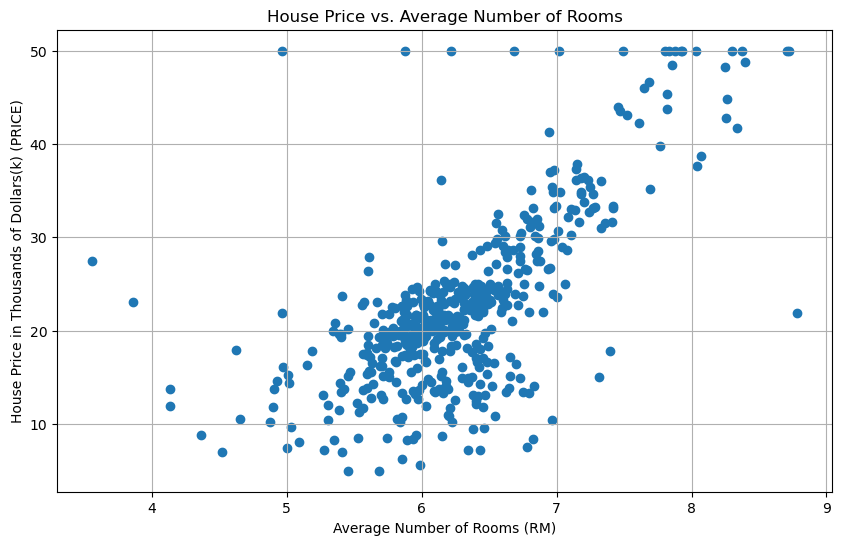

In [36]:
# TODO
plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.title("House Price vs. Average Number of Rooms")
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("House Price in Thousands of Dollars(k) (PRICE)")
plt.grid(True)
plt.show()

## Fitting a Simple Linear Model

We will write a simple function to perform a linear fit under the squared loss function. Use the formulae given in the class to compute the optimal parameters $\beta_0,\beta_1$ in the linear model $$y =\beta_0 + \beta_1 x$$ as well as the optimal loss $\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x)^2$.

In [39]:
def fit_linear(x,y):
    """
    Given vectors of data points (x,y), performs a fit for the linear model:
       y = beta0 + beta1*x,
    The function returns beta0, beta1, and loss, where loss is the sum-of-squares loss of.
    """
    # TODO complete the following code
    #compute mean
    y_mean = y.mean()
    x_mean = x.mean()
    '''
    Actually when computing beta1 we do not need to divide numerator and denominator by n since this effect will be cancelled out 
    '''
    #compute covariance
    sig_xy = sum((x - x_mean) * (y - y_mean))/len(x)
    #compute variance x
    sig_sqx = sum((x - x_mean) ** 2)/len(x)
    #compute beta1
    beta1 = sig_xy/sig_sqx
    #compute beta0
    beta0 = y_mean - beta1*x_mean
    #compute loss
    loss = sum((y-beta0-beta1*x) ** 2)
    return beta0, beta1, loss

Using the function `fit_linear` above, print the values `beta0`, `beta1` and `loss` for the linear model of price vs. number of rooms.

In [70]:
# TODO
beta0, beta1, loss = fit_linear(x,y)
print('beta0: ' + str(beta0), "beta1: " + str(beta1), 'loss: ' + str(loss))

beta0: -34.67062077643851 beta1: 9.102108981180303 loss: 22061.8791962118


Replot the scatter plot above, but now with the regression line.  You can create the regression line by creating points `yp` that are the predicted values for each value in `x`, according to our linear model. Plot as a line, not a scatter plot.

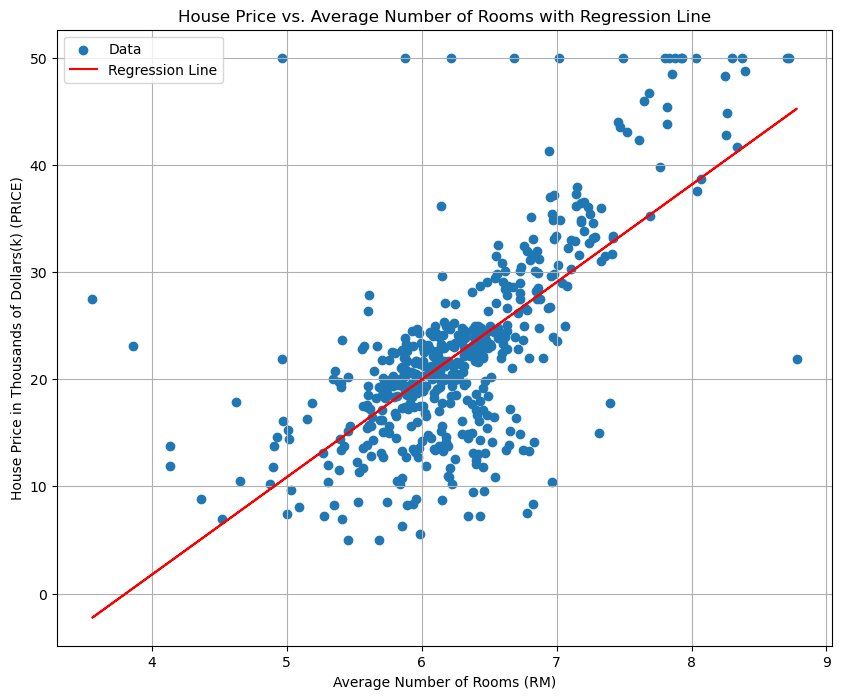

In [74]:
# TODO
#predict val
yp = beta0 + beta1 * x
plt.figure(figsize=(10, 8))
#scatter for orig data
plt.scatter(x, y, label='Data')
#predict reg line
plt.plot(x, yp, color='red', label='Regression Line')
#info
plt.title("House Price vs. Average Number of Rooms with Regression Line")
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("House Price in Thousands of Dollars(k) (PRICE)")
plt.legend()
plt.grid(True)
plt.show()

# Part 2:  Compare different dependent variables


We next compute the squared loss for all the predictors and output the values in a table. Your table should look like the following, where each entry in the first column is the attribute name and the second column is the squared loss.

    CRIM        XXXXX
    ZN          XXXXX
    INDUS       XXXXX
    ...         ...

You will need to write a loop. One option is to loop over the list of colunm names in the dataframe `df`.

What variable does the best job predicting house price?

In [54]:
# TODO
losses = {}

for col in colnames:
    if col != 'PRICE':
        # Fitting linear model for each attribute
        beta0, beta1, loss = fit_linear(df[col].values, y)
        losses[col] = loss

sort = sorted(losses.items(), key=lambda x: x[1])

# Converting to a DataFrame for display
losses_df = pd.DataFrame(sort, columns=['Attribute', 'Squared Loss'])
losses_df
'''
LSTAT does the best job predicting house price since it gives the minimum sqaured loss
'''

,Attribute,Squared Loss
0,LSTAT,19472.381418
1,RM,22061.879196
2,PTRATIO,31702.013207
3,INDUS,32721.108150
4,TAX,33338.961320
5,NOX,34916.169908
6,CRIM,36275.512356
7,RAD,36495.154812
8,AGE,36646.534350
9,ZN,37166.558224


**TODO:** Describe in words the meaning of the most predictive variable for housing price. You might need to do some Googling to figure out what it means.

# LSTAT Definition
LSTAT is defined as:
Proportion of population that is lower status = 1/2 
(proportion of adults without, some high school education and proportion of male workers classified as laborers). 
The logarithmic specification implies that socioeconomic status distinctions mean more in the upper brackets of society than in the lower classes. 


# Part 3:  Compare different loss functions

## A Brute force algorithm for squared loss

Your code in `fit_linear` relies on the closed form expressions for the optimal $\beta_0$ and $\beta_1$, which we derived in class. However, if you did not know these formulas, you could have approximately minimized the loss function by brute force searching over a grid of possible values for $\beta_0$ and $\beta_1$. This idea was suggested by a student in our class.

For example, we could try out all combinations of parameters where $\beta_0$ is in `np.arange(-50,50,1)` and $\beta_1$ is in `np.arange(-10,10,.1)`

Write a function which takes this approach to find a $\beta_0$ and $\beta_1$ which approximately minimize the squared loss: $\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x)^2$

In [67]:
def fit_approx(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the sum-of-squares loss. The min_loss returned is the lost of the best beta0 and beta1 you found.
    """
    # TODO complete the following code
    beta0, beta1 = 0,0
    min_loss = float('inf')
    beta0_list = np.arange(-50,50,1)
    beta1_list = np.arange(-10,10,.1)
    for b0 in beta0_list:
        for b1 in beta1_list:
            loss = sum((y - b0 - b1 * x) ** 2)
            if loss < min_loss:
                min_loss = loss
                beta0 = b0
                beta1 = b1

    return beta0, beta1, min_loss

Compare the output of `fit_approx` and `fit_linear` with `y` being `PRICE` and `x` being the `LSAT` variable from our dataset. You should do so:
* quantitatively, by printing the loss that each approach achieves
* and visually, by plotting the different fit lines obtained.

In [69]:
beta0_approx, beta1_approx, loss_approx = fit_approx(x,y)
print('beta0_approx: ' + str(beta0_approx), "beta1_approx: " + str(beta1_approx), 'loss_approx: ' + str(loss_approx))

beta0_approx: -34 beta1_approx: 8.999999999999932 loss_approx: 22064.901206999988


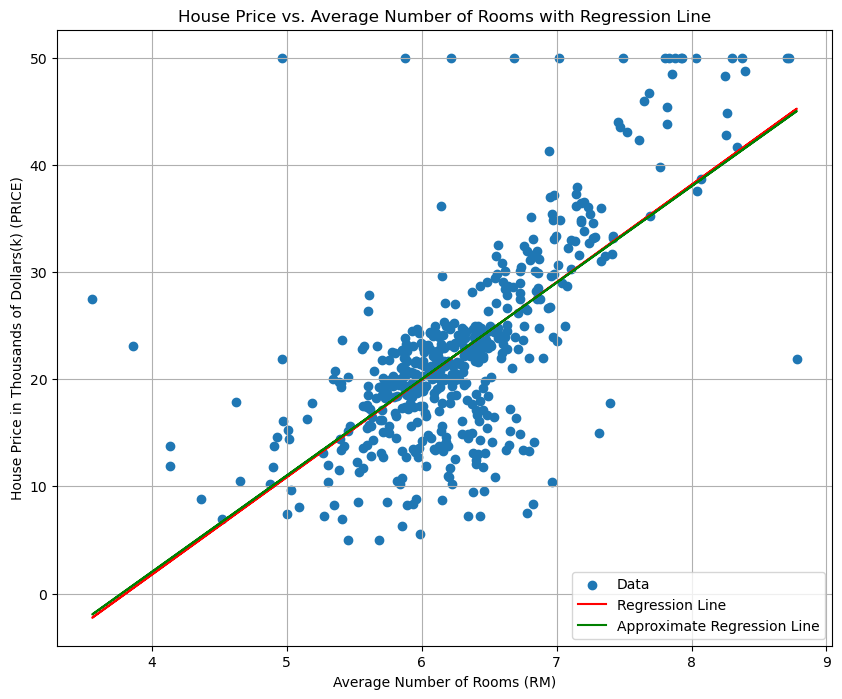

In [73]:
#predict val
yp = beta0 + beta1 * x
#predict val for approx
yp_approx = beta0_approx + beta1_approx * x
plt.figure(figsize=(10, 8))
#scatter for orig data
plt.scatter(x, y, label='Data')
#predict reg line
plt.plot(x, yp, color='red', label='Regression Line')
#approx reg line
plt.plot(x, yp_approx, color = 'green', label='Approximate Regression Line')
#info
plt.title("House Price vs. Average Number of Rooms with Regression Line")
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("House Price in Thousands of Dollars(k) (PRICE)")
plt.legend()
plt.grid(True)
plt.show()

### There is only slight difference between the regression line generated by these two different methods


## Extending to different loss functions

One benefit of the above approach is that is easily extends to different loss funtions. Write functions which find an approximately optimal $\beta_0$ and $\beta_1$ for
* minimizing the $\ell_1$ (least absolute deviations) loss: $\sum_{i=1}^n |y_i - \beta_0 - \beta_1 x|$
* minimizing the $\ell_\infty$ (max) loss: $\max_i |y_i - \beta_0 - \beta_1 x|$


In [80]:
def fit_approx_l1(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the least absolute deviations loss.
    """
    # TODO complete the following code
    beta0_range = np.arange(-50, 50, 1)
    beta1_range = np.arange(-10, 10, 0.1)
    min_loss = float('inf')
    beta0, beta1 = 0, 0

    for b0 in beta0_range:
        for b1 in beta1_range:
            #change the loss function
            loss = sum(abs(y - b0 - b1 * x))
            if loss < min_loss:
                min_loss = loss
                beta0 = b0
                beta1 = b1
                
    return beta0, beta1, min_loss

In [81]:
def fit_approx_max(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the max loss.
    """
    # TODO complete the following code
    beta0_range = np.arange(-50, 50, 1)
    beta1_range = np.arange(-10, 10, 0.1)
    min_loss = float('inf')
    beta0, beta1 = 0, 0

    for b0 in beta0_range:
        for b1 in beta1_range:
            #change the loss function
            loss = max(abs(y - b0 - b1 * x))
            if loss < min_loss:
                min_loss = loss
                beta0 = b0
                beta1 = b1

    return beta0, beta1, min_loss

Use your algorithm to obtain 3 different linear fits for `PRICE` with predictor variable `LSTAT`, one for squared loss, one for $\ell_1$ loss, and one for $\ell_\infty$ loss. Plot the linear fits (along with the data scatter plot) on a single figure and use a legend to indicate which fit corresponds to which loss.

In [82]:
beta0_l1, beta1_l1, loss_l1 = fit_approx_l1(x,y)
print('beta0_l1: ' + str(beta0_l1), "beta1_l1: " + str(beta1_l1), 'loss_l1: ' + str(loss_l1))

beta0_l1: -37 beta1_l1: 9.499999999999929 loss_l1: 2245.0935


In [83]:
beta0_max, beta1_max, loss_max = fit_approx_max(x,y)
print('beta0_max: ' + str(beta0_max), "beta1_max: " + str(beta1_max), 'loss_max: ' + str(loss_max))

beta0_max: 27 beta1_max: 0.09999999999996412 loss_max: 22.568299999999795


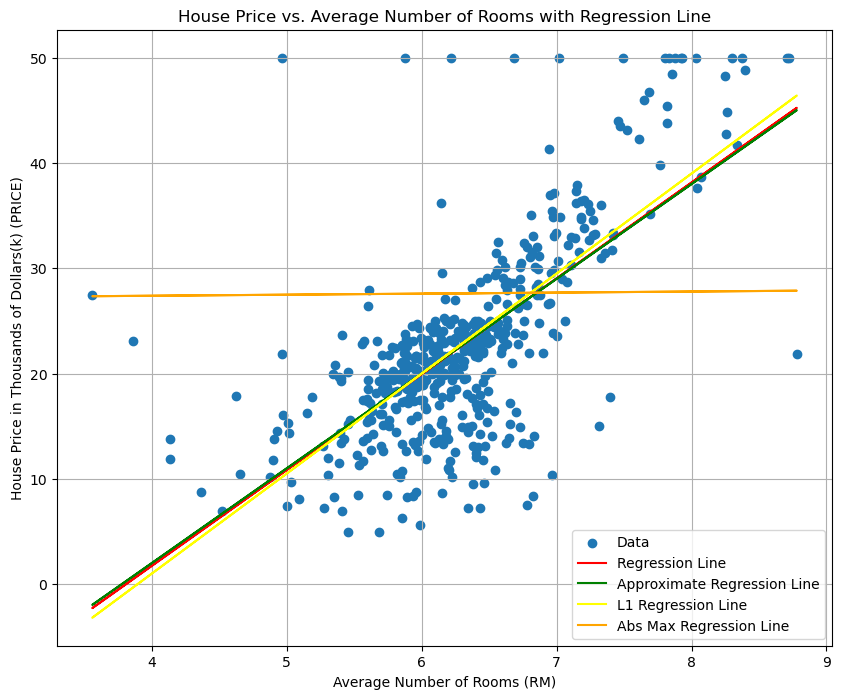

In [84]:
#predict val
yp = beta0 + beta1 * x
#predict val for approx
yp_approx = beta0_approx + beta1_approx * x
#predict val for l1
yp_l1 = beta0_l1 + beta1_l1 * x
#predict val for max
yp_max = beta0_max + beta1_max * x


plt.figure(figsize=(10, 8))
#scatter for orig data
plt.scatter(x, y, label='Data')
#predict reg line
plt.plot(x, yp, color='red', label='Regression Line')
#approx reg line
plt.plot(x, yp_approx, color = 'green', label='Approximate Regression Line')
#l1 reg line
plt.plot(x, yp_l1, color = 'yellow', label='L1 Regression Line')
#abs max reg line
plt.plot(x, yp_max, color = 'orange', label='Abs Max Regression Line')
#info
plt.title("House Price vs. Average Number of Rooms with Regression Line")
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("House Price in Thousands of Dollars(k) (PRICE)")
plt.legend()
plt.grid(True)
plt.show()